<a href="https://colab.research.google.com/github/GeeteshT/Project/blob/master/Counterfeit_Drugs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv(r"/content/drive/My Drive/Data/counterfeit_train.csv")

In [ ]:
df.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [ ]:
df.shape

(6818, 12)

In [ ]:
df.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'Counterfeit_Sales'],
      dtype='object')

In [ ]:
for col in df.columns:
  print("==={}===".format(col))
  print(df[col].value_counts())

===Medicine_ID===
RQS74    9
HQH91    9
OQH15    9
KIS14    9
QLK14    9
        ..
RLS13    1
WGC12    1
WTA87    1
KQB14    1
UKN13    1
Name: Medicine_ID, Length: 1557, dtype: int64
===Counterfeit_Weight===
13.450    72
18.900    67
13.100    65
18.000    55
14.950    55
          ..
6.510      1
7.395      1
6.700      1
8.195      1
8.060      1
Name: Counterfeit_Weight, Length: 414, dtype: int64
===DistArea_ID===
Area017    760
Area046    749
Area013    749
Area035    748
Area049    739
Area045    736
Area027    735
Area018    729
Area010    442
Area019    431
Name: DistArea_ID, dtype: int64
===Active_Since===
1983    1166
2005     760
1995     749
1985     749
2002     748
1997     739
2000     736
2007     729
1996     442
Name: Active_Since, dtype: int64
===Medicine_MRP===
152.3154    6
182.3422    5
137.4020    5
131.1756    5
119.8228    5
           ..
83.5354     1
129.6124    1
97.9856     1
106.2726    1
50.0138     1
Name: Medicine_MRP, Length: 5097, dtype: int64
===Med

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          6818 non-null   object 
 1   Counterfeit_Weight   5652 non-null   float64
 2   DistArea_ID          6818 non-null   object 
 3   Active_Since         6818 non-null   int64  
 4   Medicine_MRP         6818 non-null   float64
 5   Medicine_Type        6818 non-null   object 
 6   SidEffect_Level      6818 non-null   object 
 7   Availability_rating  6818 non-null   float64
 8   Area_Type            6818 non-null   object 
 9   Area_City_Type       6818 non-null   object 
 10  Area_dist_level      6818 non-null   object 
 11  Counterfeit_Sales    6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [ ]:
df.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
count,5652.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,14.115057,1995.836316,151.401518,0.079174,2280.583480
std,4.649668,8.368979,62.203961,0.051481,1693.354404
min,5.855000,1983.000000,41.790000,0.013000,146.290000
25%,9.995000,1985.000000,104.509400,0.040058,933.265600
50%,13.800000,1997.000000,153.195700,0.066955,1902.670400
75%,18.050000,2002.000000,196.148350,0.107697,3207.638400
max,22.650000,2007.000000,277.188400,0.341391,13199.964800


In [ ]:
pd.DataFrame(list(zip(df.mean(),df.median())),columns=["Mean","Median"]) 

,Mean,Median
0,14.115057,13.800000
1,1995.836316,1997.000000
2,151.401518,153.195700
3,0.079174,0.066955
4,2280.583480,1902.670400


In [ ]:
is_null_val=[col for col in df.columns if(df[col].isnull().sum()>1)]

In [ ]:
print(is_null_val)
for col in is_null_val:
  print(col,df[col].isnull().mean())

['Counterfeit_Weight']
Counterfeit_Weight 0.17101789381050161


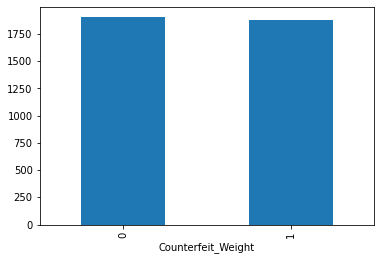

In [ ]:
for col in is_null_val:
  data=df.copy()
  data[col]=np.where(df[col].isnull(),1,0)
  data.groupby(col)["Counterfeit_Sales"].median().plot.bar()
  plt.show()

In [ ]:
numerical_feature=[feature for feature in df.columns if(df[feature].dtypes!="O")]

In [ ]:
print(numerical_feature)
for col in numerical_feature:
  print(col,len(df[col].unique()))

['Counterfeit_Weight', 'Active_Since', 'Medicine_MRP', 'Availability_rating', 'Counterfeit_Sales']
Counterfeit_Weight 415
Active_Since 9
Medicine_MRP 5097
Availability_rating 6317
Counterfeit_Sales 3142


In [ ]:
for col in numerical_feature:
  print("==={}==".format(col))
  print(df[col].value_counts())

===Counterfeit_Weight==
13.450    72
18.900    67
13.100    65
18.000    55
14.950    55
          ..
6.510      1
7.395      1
6.700      1
8.195      1
8.060      1
Name: Counterfeit_Weight, Length: 414, dtype: int64
===Active_Since==
1983    1166
2005     760
1995     749
1985     749
2002     748
1997     739
2000     736
2007     729
1996     442
Name: Active_Since, dtype: int64
===Medicine_MRP==
152.3154    6
182.3422    5
137.4020    5
131.1756    5
119.8228    5
           ..
83.5354     1
129.6124    1
97.9856     1
106.2726    1
50.0138     1
Name: Medicine_MRP, Length: 5097, dtype: int64
===Availability_rating==
0.013000    419
0.089975      3
0.141296      2
0.200443      2
0.027099      2
           ... 
0.202690      1
0.075798      1
0.222143      1
0.048954      1
0.139480      1
Name: Availability_rating, Length: 6317, dtype: int64
===Counterfeit_Sales==
1455.2528    16
1071.7520    14
816.0848     13
1391.3360    13
1958.5976    12
             ..
8526.0488     1
1125

Text(0.5, 1.0, 'Active_Since Vs Counterfit_sales')

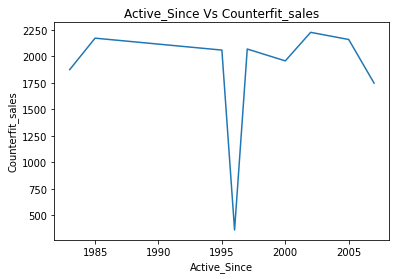

In [ ]:
df.groupby("Active_Since")["Counterfeit_Sales"].median().plot()
plt.xlabel("Active_Since")
plt.ylabel("Counterfit_sales")
plt.title("Active_Since Vs Counterfit_sales")

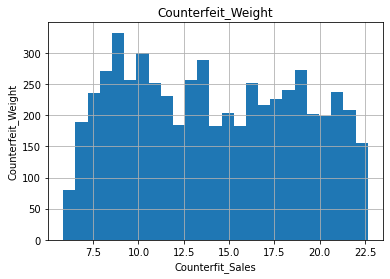

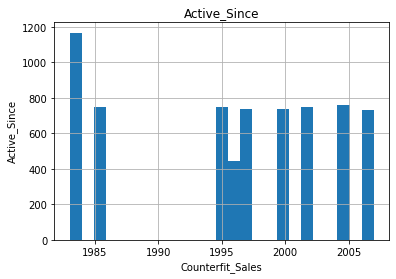

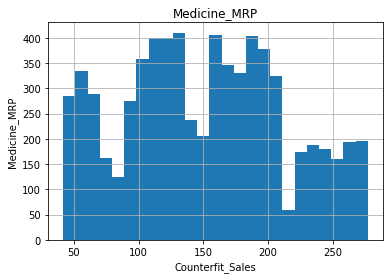

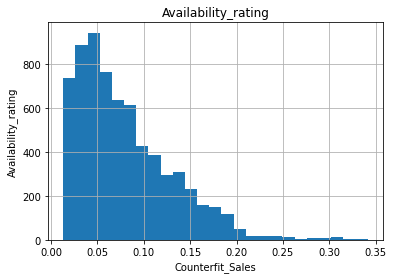

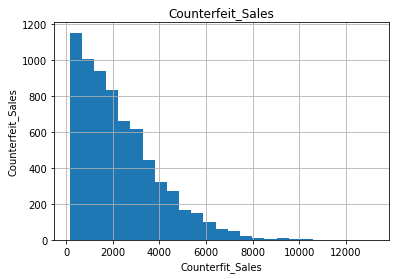

In [ ]:
for col in numerical_feature:
  data=df.copy()
  data[col].hist(bins=25)
  plt.xlabel("Counterfit_Sales")
  plt.ylabel(col)
  plt.title(col)
  plt.show()

In [ ]:
df.skew()

Counterfeit_Weight     0.090156
Active_Since          -0.398311
Medicine_MRP           0.123301
Availability_rating    1.161364
Counterfeit_Sales      1.182056
dtype: float64

In [ ]:
numerical_feature= ['Counterfeit_Weight','Medicine_MRP','Availability_rating','Counterfeit_Sales']

In [ ]:
numerical_feature

['Counterfeit_Weight',
 'Medicine_MRP',
 'Availability_rating',
 'Counterfeit_Sales']

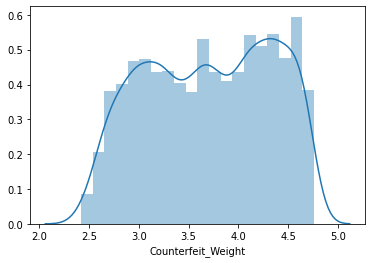

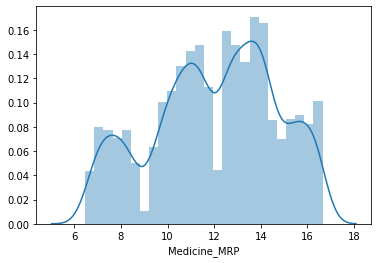

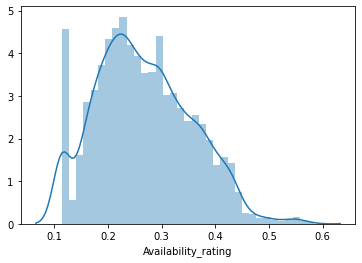

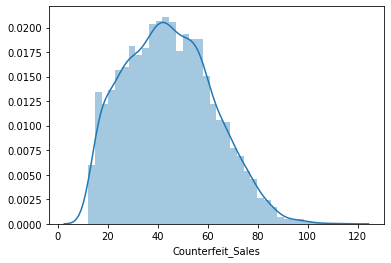

In [ ]:
for col in numerical_feature:
  data=df.copy()
  sns.distplot(np.sqrt(data[col]))
  plt.show()

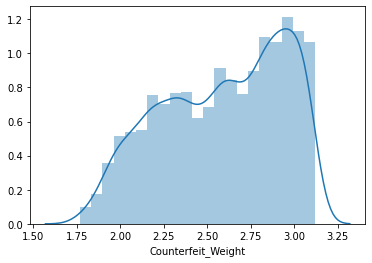

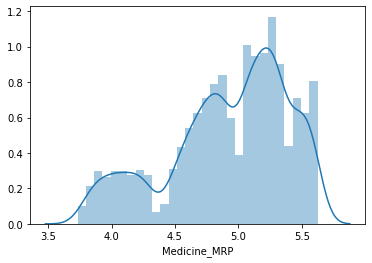

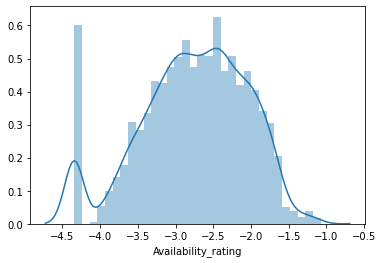

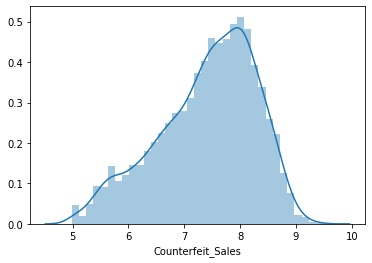

In [ ]:
for col in numerical_feature:
  data=df.copy()
  sns.distplot(np.log(data[col]))
  plt.show()

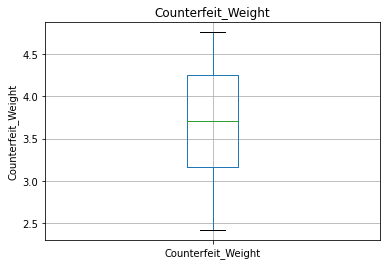

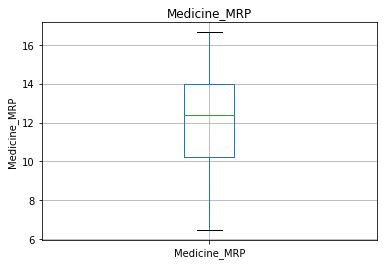

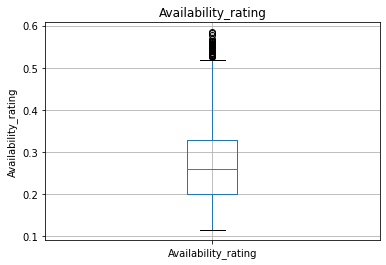

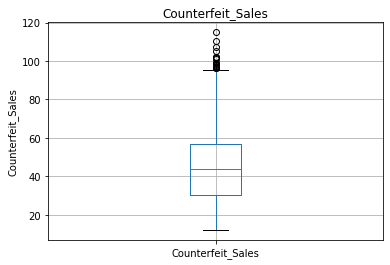

In [ ]:
for col in numerical_feature:
  data=df.copy()
  data[col]=np.sqrt(data[col])
  data.boxplot(column=col)
  plt.ylabel(col)
  plt.title(col)
  plt.show()  

In [ ]:
categorical_feature=[feature for feature in df.columns if(df[feature].dtypes=="O")]
print(categorical_feature)

['Medicine_ID', 'DistArea_ID', 'Medicine_Type', 'SidEffect_Level', 'Area_Type', 'Area_City_Type', 'Area_dist_level']


In [ ]:
df[categorical_feature].head()

,Medicine_ID,DistArea_ID,Medicine_Type,SidEffect_Level,Area_Type,Area_City_Type,Area_dist_level
0,RRA15,Area046,Antimalarial,critical,DownTown,Tier 1,Small
1,YVV26,Area027,Mstablizers,mild,CityLimits,Tier 3,Medium
2,LJC15,Area046,Cardiac,mild,DownTown,Tier 1,Small
3,GWC40,Area046,OralContraceptives,mild,DownTown,Tier 1,Small
4,QMN13,Area019,Hreplacements,critical,MidTownResidential,Tier 1,Small


In [ ]:
for col in categorical_feature:
  print("==={}====".format(col))
  print("=={}===length =={}===".format(df[col].value_counts(),len(df[col].unique())))

===Medicine_ID====
==RQS74    9
HQH91    9
OQH15    9
KIS14    9
QLK14    9
        ..
RLS13    1
WGC12    1
WTA87    1
KQB14    1
UKN13    1
Name: Medicine_ID, Length: 1557, dtype: int64===length ==1557===
===DistArea_ID====
==Area017    760
Area046    749
Area013    749
Area035    748
Area049    739
Area045    736
Area027    735
Area018    729
Area010    442
Area019    431
Name: DistArea_ID, dtype: int64===length ==10===
===Medicine_Type====
==Hreplacements         976
Antibiotics           970
Antiseptics           724
OralContraceptives    694
Antipyretics          536
Cardiac               522
Mstablizers           514
Tranquilizers         420
Analgesics            356
Antimalarial          339
Antacids              206
Statins               167
MuscleRelaxants       139
Antifungal            111
Stimulants             95
Antiviral              49
Name: Medicine_Type, dtype: int64===length ==16===
===SidEffect_Level====
==mild        4434
critical    2384
Name: SidEffect_Level, d

In [ ]:
df["SidEffect_Level"]=pd.to_numeric(np.where(df["SidEffect_Level"]=="mild",1,0))

In [ ]:
df["SidEffect_Level"].dtype

dtype('int64')

In [ ]:
df.select_dtypes(["object"])

,Medicine_ID,DistArea_ID,Medicine_Type,Area_Type,Area_City_Type,Area_dist_level
0,RRA15,Area046,Antimalarial,DownTown,Tier 1,Small
1,YVV26,Area027,Mstablizers,CityLimits,Tier 3,Medium
2,LJC15,Area046,Cardiac,DownTown,Tier 1,Small
3,GWC40,Area046,OralContraceptives,DownTown,Tier 1,Small
4,QMN13,Area019,Hreplacements,MidTownResidential,Tier 1,Small
...,...,...,...,...,...,...
6813,OYN80,Area046,Hreplacements,DownTown,Tier 1,Small
6814,ACW12,Area046,Hreplacements,DownTown,Tier 1,Small
6815,OPM10,Area017,Antimalarial,DownTown,Tier 2,Unknown
6816,SLY12,Area045,Statins,DownTown,Tier 2,Unknown


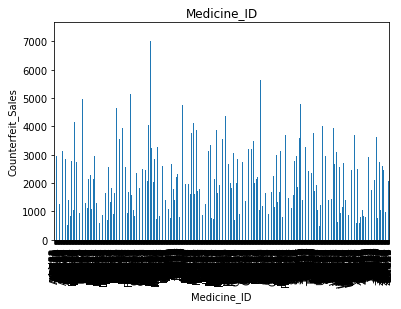

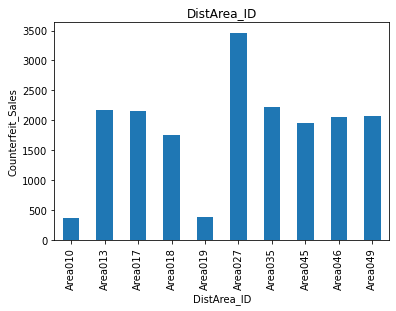

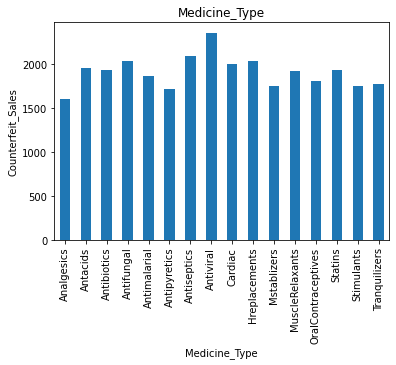

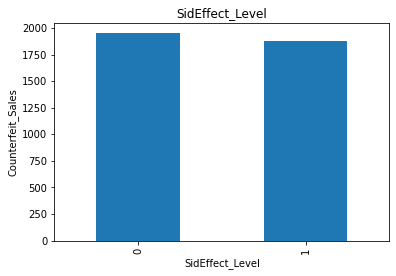

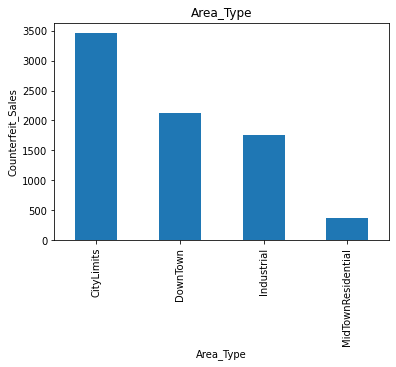

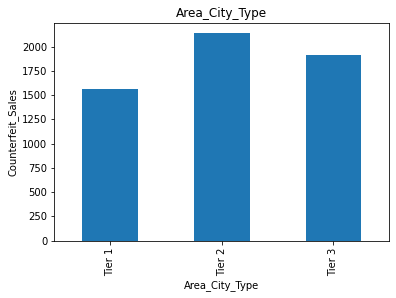

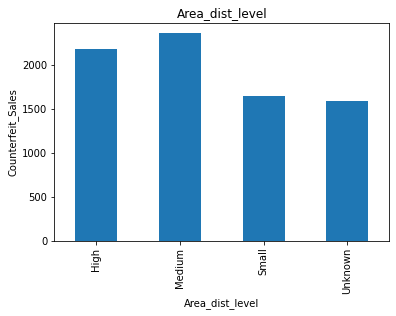

In [ ]:
for col in categorical_feature:
  data=df.copy()
  data.groupby(col)["Counterfeit_Sales"].median().plot.bar()
  plt.xlabel(col)
  plt.ylabel("Counterfeit_Sales")
  plt.title(col)
  plt.show()

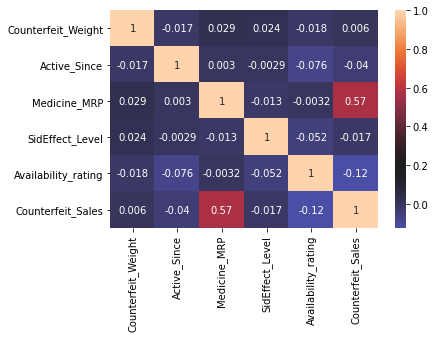

In [ ]:
sns.heatmap(df.corr(),center=0.2,annot=True)

# **Feature Engineering**

In [ ]:
df[categorical_feature].isnull().sum()

Medicine_ID        0
DistArea_ID        0
Medicine_Type      0
SidEffect_Level    0
Area_Type          0
Area_City_Type     0
Area_dist_level    0
dtype: int64

In [ ]:
df[is_null_val]

,Counterfeit_Weight
0,13.100
1,NaN
2,9.025
3,11.800
4,NaN
...,...
6813,8.535
6814,20.650
6815,20.000
6816,10.180


In [ ]:
df[numerical_feature]

,Counterfeit_Weight,Medicine_MRP,Availability_rating,Counterfeit_Sales
0,13.100,160.2366,0.070422,1775.5026
1,NaN,110.4384,0.013000,3069.1520
2,9.025,259.4092,0.060783,2603.0920
3,11.800,99.9830,0.065555,1101.7130
4,NaN,56.4402,0.248859,158.9402
...,...,...,...,...
6813,8.535,204.1452,0.112963,2070.4520
6814,20.650,235.1088,0.131103,2126.3792
6815,20.000,193.6292,0.105096,2119.7212
6816,10.180,162.8682,0.099957,1485.2138


In [ ]:
df.drop("Medicine_ID",axis=1,inplace=True)

In [ ]:
for col in df.select_dtypes(["object"]).columns:
  dummy=pd.get_dummies(df[col],prefix=col,drop_first=True)
  df=pd.concat([df,dummy],axis=1)
  del df[col]
  print(col)
del dummy

DistArea_ID
Medicine_Type
Area_Type
Area_City_Type
Area_dist_level


In [ ]:
df[numerical_feature]

,Counterfeit_Weight,Medicine_MRP,Availability_rating,Counterfeit_Sales
0,13.100,160.2366,0.070422,1775.5026
1,NaN,110.4384,0.013000,3069.1520
2,9.025,259.4092,0.060783,2603.0920
3,11.800,99.9830,0.065555,1101.7130
4,NaN,56.4402,0.248859,158.9402
...,...,...,...,...
6813,8.535,204.1452,0.112963,2070.4520
6814,20.650,235.1088,0.131103,2126.3792
6815,20.000,193.6292,0.105096,2119.7212
6816,10.180,162.8682,0.099957,1485.2138


In [ ]:
for col in is_null_val:
  df.loc[df[col].isnull(),col]=df[col].median()

In [ ]:
for col in numerical_feature:
  df[col]=np.log(df[col]+1)

In [ ]:
df.isnull().sum()

Counterfeit_Weight                  0
Active_Since                        0
Medicine_MRP                        0
SidEffect_Level                     0
Availability_rating                 0
Counterfeit_Sales                   0
DistArea_ID_Area013                 0
DistArea_ID_Area017                 0
DistArea_ID_Area018                 0
DistArea_ID_Area019                 0
DistArea_ID_Area027                 0
DistArea_ID_Area035                 0
DistArea_ID_Area045                 0
DistArea_ID_Area046                 0
DistArea_ID_Area049                 0
Medicine_Type_Antacids              0
Medicine_Type_Antibiotics           0
Medicine_Type_Antifungal            0
Medicine_Type_Antimalarial          0
Medicine_Type_Antipyretics          0
Medicine_Type_Antiseptics           0
Medicine_Type_Antiviral             0
Medicine_Type_Cardiac               0
Medicine_Type_Hreplacements         0
Medicine_Type_Mstablizers           0
Medicine_Type_MuscleRelaxants       0
Medicine_Typ

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test=train_test_split(df,test_size=0.2,random_state=10)

In [ ]:
x_train=train.drop("Counterfeit_Sales",axis=1)
y_train=train["Counterfeit_Sales"]
x_test=test.drop("Counterfeit_Sales",axis=1)
y_test=test["Counterfeit_Sales"]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.intercept_

-4828966838528.722

In [ ]:
list(zip(x_train.columns,lm.coef_))

[('Counterfeit_Weight', -0.018553050647675068),
 ('Active_Since', 2424507296.5255985),
 ('Medicine_MRP', 1.0107738055549913),
 ('SidEffect_Level', -0.018574070877507138),
 ('Availability_rating', -0.10235397450821819),
 ('DistArea_ID_Area013', 17277288188.404137),
 ('DistArea_ID_Area017', -4876441357.544866),
 ('DistArea_ID_Area018', -18360486065.55718),
 ('DistArea_ID_Area019', 18991474616.236702),
 ('DistArea_ID_Area027', 21439506684.102524),
 ('DistArea_ID_Area035', -12767027899.662174),
 ('DistArea_ID_Area045', 7246095125.021645),
 ('DistArea_ID_Area046', -5297860115.202728),
 ('DistArea_ID_Area049', -6272185821.222919),
 ('Medicine_Type_Antacids', 0.01837679204995798),
 ('Medicine_Type_Antibiotics', -0.01830545258594978),
 ('Medicine_Type_Antifungal', -0.06550009645303316),
 ('Medicine_Type_Antimalarial', -0.02903179824872781),
 ('Medicine_Type_Antipyretics', -0.0411483743519795),
 ('Medicine_Type_Antiseptics', -0.014103723601072532),
 ('Medicine_Type_Antiviral', 0.094001118483060

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_train,lm.predict(x_train))

0.353904638005144

In [ ]:
mae=mean_absolute_error(y_test,lm.predict(x_test))
print(mae)

0.3580804105613609


In [ ]:
score=1-(mae/1660)
print(score)

0.9997842889093004


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
predicted=lm.predict(x_test)

In [ ]:
r2_score(y_test,predicted)

0.7056292737778989

In [ ]:
x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [ ]:
alphas = np.linspace(0.001, 1, 1000)
rmse_list = []
for a in alphas:
    ridge = Ridge(fit_intercept=True, alpha=a)
    # 10-fold cross validation
    kf = KFold(n_splits=10)
    xval_error = 0
    for train_, test_ in kf.split(x_train):
        ridge.fit(x_train.loc[train_], y_train[train_])
        p = ridge.predict(x_train.loc[test_])
        err = p - y_train[test_]
        xval_error += np.dot(err, err)
    rmse_10cv = np.sqrt(xval_error/len(x_train))
    rmse_list.extend([rmse_10cv])
best_alpha = alphas[rmse_list == min(rmse_list)]
print("Alpha with min 10cv error is: ", best_alpha)

Alpha with min 10cv error is:  [1.]


In [ ]:
ridge = Ridge(fit_intercept=True, alpha=best_alpha)
ridge.fit(x_train, y_train)
p_test = ridge.predict(x_test)
test_err = p_test - y_test
rmse_ridge = np.sqrt(np.dot(test_err, test_err)/len(p_test))
rmse_ridge

0.4620132009262265

In [ ]:
alphas = np.linspace(0.0001, 1, 1000)
rmse_list = []
for a in alphas:
    lasso = Lasso(fit_intercept=True, alpha=a)
    # 10-fold cross validation
    kf = KFold(n_splits=10)
    xval_error = 0
    for train_, test_ in kf.split(x_train):
        lasso.fit(x_train.loc[train_], y_train[train_])
        p = lasso.predict(x_train.loc[test_])
        err = p - y_train[test_]
        xval_error += np.dot(err, err)
    rmse_10cv = np.sqrt(xval_error/len(x_train))
    rmse_list.extend([rmse_10cv])
best_alpha = alphas[rmse_list == min(rmse_list)]
print("Alpha with min 10cv error is: ", best_alpha)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227.44037622620237, tolerance: 0.3791870767698958
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268.91739051013866, tolerance: 0.37667744331726294
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155.2188966336929, tolerance: 0.3773783743170485
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 264.65

Alpha with min 10cv error is:  [0.0021018]


In [ ]:
lasso = Lasso(fit_intercept=True, alpha=best_alpha)
lasso.fit(x_train, y_train)
p_test = lasso.predict(x_test)
test_err = p_test - y_test
rmse_lasso = np.sqrt(np.dot(test_err, test_err)/len(p_test))
rmse_lasso

0.4607478341313963

In [ ]:
lasso.intercept_

2.692717459309863

In [ ]:
list(zip(x_train.columns,lasso.coef_))

[('Counterfeit_Weight', -0.0),
 ('Active_Since', -9.18805251383672e-05),
 ('Medicine_MRP', 1.0002525619632736),
 ('SidEffect_Level', -0.005077365578371239),
 ('Availability_rating', -0.0),
 ('DistArea_ID_Area013', -0.0),
 ('DistArea_ID_Area017', 0.005267101653635823),
 ('DistArea_ID_Area018', -0.0),
 ('DistArea_ID_Area019', -0.0),
 ('DistArea_ID_Area027', 0.6295417327706598),
 ('DistArea_ID_Area035', 0.012290071062388977),
 ('DistArea_ID_Area045', -0.01760281790299859),
 ('DistArea_ID_Area046', -0.0),
 ('DistArea_ID_Area049', 0.0),
 ('Medicine_Type_Antacids', 0.0),
 ('Medicine_Type_Antibiotics', -0.0),
 ('Medicine_Type_Antifungal', -0.0),
 ('Medicine_Type_Antimalarial', -0.0),
 ('Medicine_Type_Antipyretics', -0.0009137848859398097),
 ('Medicine_Type_Antiseptics', -0.0),
 ('Medicine_Type_Antiviral', 0.0),
 ('Medicine_Type_Cardiac', 0.0),
 ('Medicine_Type_Hreplacements', 0.0),
 ('Medicine_Type_Mstablizers', -0.0),
 ('Medicine_Type_MuscleRelaxants', 0.0),
 ('Medicine_Type_OralContraceptiv

In [ ]:
data=pd.DataFrame(list(zip(x_train.columns,lasso.coef_)),columns=["Columns_Name","Values"])

In [ ]:
new_val=data[data["Values"]!=0]
print(new_val)

                    Columns_Name    Values
1                   Active_Since -0.000092
2                   Medicine_MRP  1.000253
3                SidEffect_Level -0.005077
6            DistArea_ID_Area017  0.005267
9            DistArea_ID_Area027  0.629542
10           DistArea_ID_Area035  0.012290
11           DistArea_ID_Area045 -0.017603
18    Medicine_Type_Antipyretics -0.000914
29            Area_Type_DownTown  0.136960
31  Area_Type_MidTownResidential -1.430862
32         Area_City_Type_Tier 2  0.018471
33         Area_City_Type_Tier 3 -0.019610
34        Area_dist_level_Medium  0.015281


In [ ]:
new_df=df[new_val["Columns_Name"]]
new_df["Counterfeit_Sales"]=df["Counterfeit_Sales"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
new_df

,Active_Since,Medicine_MRP,SidEffect_Level,DistArea_ID_Area017,DistArea_ID_Area027,DistArea_ID_Area035,DistArea_ID_Area045,Medicine_Type_Antipyretics,Area_Type_DownTown,Area_Type_MidTownResidential,Area_City_Type_Tier 2,Area_City_Type_Tier 3,Area_dist_level_Medium,Counterfeit_Sales
0,1995,5.082873,0,0,0,0,0,0,1,0,0,0,0,7.482402
1,1983,4.713472,1,0,1,0,0,0,0,0,0,1,1,8.029482
2,1995,5.562254,1,0,0,0,0,0,1,0,0,0,0,7.864839
3,1995,4.614952,1,0,0,0,0,0,1,0,0,0,0,7.005529
4,1983,4.050744,0,0,0,0,0,0,0,1,0,0,0,5.074800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,1995,5.323718,1,0,0,0,0,0,1,0,0,0,0,7.636005
6814,1995,5.464293,1,0,0,0,0,0,1,0,0,0,0,7.662646
6815,2005,5.271096,0,1,0,0,0,0,1,0,1,0,0,7.659511
6816,2000,5.099062,1,0,0,0,1,0,1,0,1,0,0,7.303987


In [ ]:
train_,test_=train_test_split(new_df,test_size=0.2,random_state=10)

In [ ]:
x_train_=train_.drop("Counterfeit_Sales",axis=1)
y_train_=train_["Counterfeit_Sales"]
x_test_=test_.drop("Counterfeit_Sales",axis=1)
y_test_=test_["Counterfeit_Sales"]

In [ ]:
lm.fit(x_train_,y_train_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
mean_absolute_error(y_train_,lm.predict(x_train_))

0.3539214068924333

In [ ]:
mae=mean_absolute_error(y_test_,lm.predict(x_test_))

In [ ]:
score=1-(mae/1660)
print(score)

0.9997848352269247


In [ ]:
r2_score(y_test_,lm.predict(x_test_))

0.7069943065615587